In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from scipy.integrate import odeint
from IPython.display import HTML

%matplotlib inline

In [8]:
def projectile_rhs(r, t, b=1.0, c=1.0, m=1.0):
    x,y,vx,vy = r
    vsq = vx**2 + vy**2
    vmag = np.sqrt(vsq)
    
    ax = (-b*vx - c*vsq*vx/vmag)/m
    ay = -9.8 + (-b*vy - c*vsq*vy/vmag)/m
    
    return vx,vy,ax,ay

In [18]:
times = np.linspace(0, 0.85, 1000)
ic = (0,0,10,10)

In [19]:
result = odeint(projectile_rhs, ic, times)

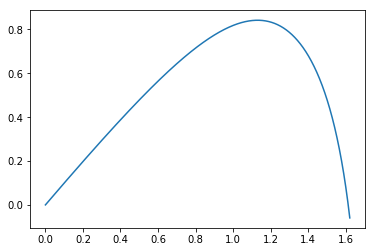

In [20]:
plt.plot(result[:,0], result[:,1])

In [34]:
times = np.linspace(0, 0.85, 1000)
ic = (0,0,10,10)
result = odeint(projectile_rhs, ic, times)
x = result[:,0]
y = result[:,1]
vx = result[:,2]
vy = result[:,3]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(0,1.8)
ax.set_ylim(0,1.0)
pointmarker, = ax.plot([], [], "o")
traversed, = ax.plot([], [], ":")

def init():
    pointmarker.set_data([], [])
    traversed.set_data([], [])
    return pointmarker, traversed

def animate(i):
    pointmarker.set_data(x[i], y[i])
    traversed.set_data(x[:i], y[:i])
    return pointmarker, traversed

anim = animation.FuncAnimation(fig, animate, frames=len(times), blit=True, init_func=init, interval=100)
plt.close(fig)

In [29]:
# save the animation -- best if you're running on your own computer
# though you will have to install ffmpeg
anim.save("foo.mp4", fps=30)

In [35]:
# display inline -- this takes a bit to compute and load
# the "interval" argument determines the length of the encode
HTML(anim.to_html5_video())

Try with a shorter interval to show the effect on the speed of the animation.

In [38]:
times = np.linspace(0, 0.85, 1000)
ic = (0,0,10,10)
result = odeint(projectile_rhs, ic, times)
x = result[:,0]
y = result[:,1]
vx = result[:,2]
vy = result[:,3]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(0,1.8)
ax.set_ylim(0,1.0)
pointmarker, = ax.plot([], [], "o")
traversed, = ax.plot([], [], ":")

def init():
    pointmarker.set_data([], [])
    traversed.set_data([], [])
    return pointmarker, traversed

def animate(i):
    pointmarker.set_data(x[i], y[i])
    traversed.set_data(x[:i], y[:i])
    return pointmarker, traversed

# this creates the animation without rendering it
anim = animation.FuncAnimation(fig, animate, frames=len(times), blit=True, init_func=init, interval=10)
plt.close(fig)

In [39]:
# display inline -- this takes a bit to compute and load
HTML(anim.to_html5_video())

## Adding some annotations

In [46]:
times = np.linspace(0, 0.85, 1000)
ic = (0,0,10,10)
result = odeint(projectile_rhs, ic, times)
x = result[:,0]
y = result[:,1]
vx = result[:,2]
vy = result[:,3]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(0,1.8)
ax.set_ylim(0,1.0)
pointmarker, = ax.plot([], [], "o")
traversed, = ax.plot([], [], ":")

time_label = plt.text(1.0, 0.05, "")
speed_label = plt.text(1.0, 0.08, "")

def init():
    pointmarker.set_data([], [])
    traversed.set_data([], [])
    time_label.set_text("")
    speed_label.set_text("")
    return pointmarker, traversed, time_label

def animate(i):
    pointmarker.set_data(x[i], y[i])
    traversed.set_data(x[:i], y[:i])
    time_label.set_text("t = {:6.3f} s".format(times[i]))
    v = np.sqrt(vx[i]**2 + vy[i]**2)
    speed_label.set_text("v = {:6.3f} m/s".format(v))
    return pointmarker, traversed, time_label, speed_label

anim = animation.FuncAnimation(fig, animate, frames=len(times), blit=True, init_func=init, interval=10)
plt.close(fig)
HTML(anim.to_html5_video())